# Famous Iris classification

this dataset is from kaggle : "https://github.com/HK2226/ML-Programs/blob/main/iris/Iris.csv"

> To solve this problem we are going to use the following methodology:

* Defining the problem
* Data analysis
* Data visualization
* Chosing the model
* evaluating

In [1]:
# importing required libraries

# Data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Classification model 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
iris_data = pd.read_csv("Iris.csv")
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Defining the problem:

In [3]:
iris_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Our main aim in this problem is to classify which type of iris flower
There are three type of iris flower types

* Setosa
* Versicolor
* Virginica

this classification should be based on the following parameters

* Sepal length(cm)
* Sepal width(cm)
* Petal length(cm)
* Petal width(cm)

### Data Analysis and Data Visualization:

In [4]:
len(iris_data)

150

there are totally 150 data

In [5]:
iris_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

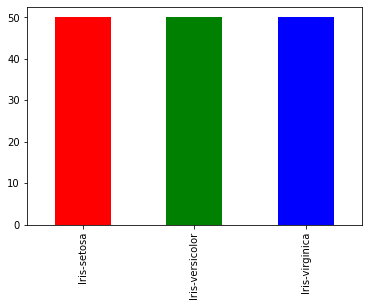

In [6]:
iris_data["Species"].value_counts().plot(kind = "bar",color = ["red","green","blue"]);

There are 3 types and each has 50 data sets

In [7]:
# Checking for null data

iris_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

no null data

In [8]:
# Statistical description

iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Sepal Length and Sepal Width: types of iris flowers

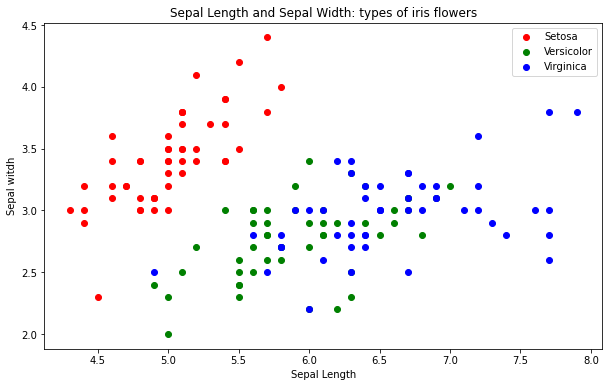

In [9]:
# Fixing the Plot size
plt.figure(figsize=(10,6))

# Scatter plot for 3 different types
plt.scatter(iris_data.SepalLengthCm[iris_data.Species == "Iris-setosa"],
            iris_data.SepalWidthCm[iris_data.Species == "Iris-setosa"],
            c="red")

plt.scatter(iris_data.SepalLengthCm[iris_data.Species == "Iris-versicolor"],
            iris_data.SepalWidthCm[iris_data.Species == "Iris-versicolor"],
            c="green")
plt.scatter(iris_data.SepalLengthCm[iris_data.Species == "Iris-virginica"],
            iris_data.SepalWidthCm[iris_data.Species == "Iris-virginica"],
            c="blue")

#Labeling the plot
plt.title("Sepal Length and Sepal Width: types of iris flowers")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal witdh")
plt.legend(["Setosa","Versicolor","Virginica"]);

### Petal Length and Petal Width: types of iris flowers

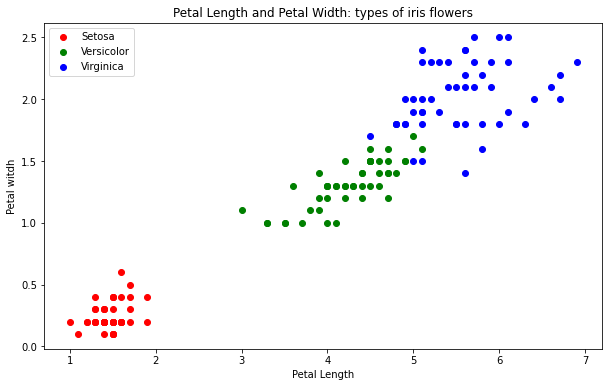

In [10]:
# Fixing the Plot size
plt.figure(figsize=(10,6))

# Scatter plot for 3 different types
plt.scatter(iris_data.PetalLengthCm[iris_data.Species == "Iris-setosa"],
            iris_data.PetalWidthCm[iris_data.Species == "Iris-setosa"],
            c="red")

plt.scatter(iris_data.PetalLengthCm[iris_data.Species == "Iris-versicolor"],
            iris_data.PetalWidthCm[iris_data.Species == "Iris-versicolor"],
            c="green")
plt.scatter(iris_data.PetalLengthCm[iris_data.Species == "Iris-virginica"],
            iris_data.PetalWidthCm[iris_data.Species == "Iris-virginica"],
            c="blue")

#Labeling the plot
plt.title("Petal Length and Petal Width: types of iris flowers")
plt.xlabel("Petal Length")
plt.ylabel("Petal witdh")
plt.legend(["Setosa","Versicolor","Virginica"]);

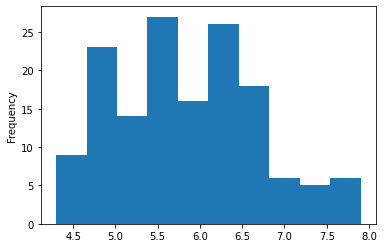

In [11]:
# Distribution of data

iris_data.SepalLengthCm.plot.hist();

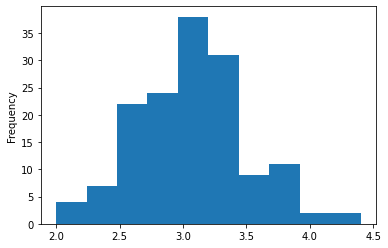

In [12]:
iris_data.SepalWidthCm.plot.hist();

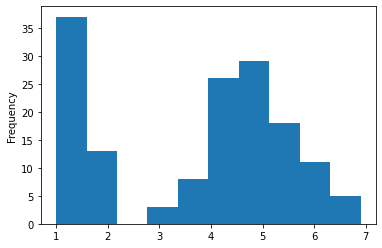

In [13]:
iris_data.PetalLengthCm.plot.hist();

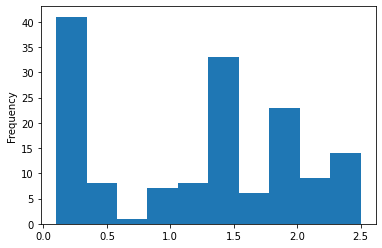

In [14]:
iris_data.PetalWidthCm.plot.hist();

#### Finding the correlation of the data

In [15]:
iris_data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


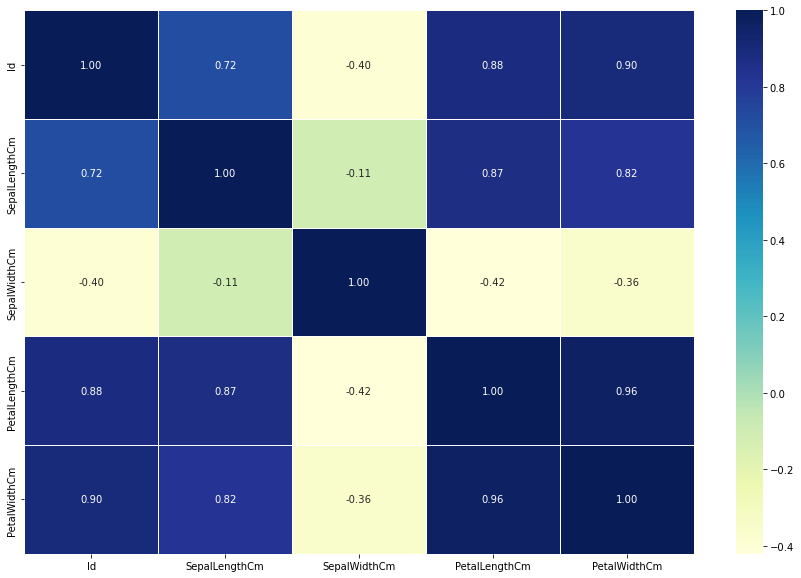

In [16]:
# Visual 
corr_mat = iris_data.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

1 - Iris-setosa

2 - Iris-versicolor

3 - Iris-virginica


In [17]:
ex = {'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}
iris_data.replace({'Species':ex},inplace=True)

## Modeling

In [18]:
# Splitting the data
x = iris_data.drop("Species",axis = 1)
y = iris_data["Species"]

In [19]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

In [21]:
# Spliting the data into train and test dataset

# to reproduce the exact data chosen
np.random.seed(42) 

# Actual splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [22]:
len(x_train),len(x_test)

(120, 30)

In [23]:
len(y_train),len(y_test)

(120, 30)

In [24]:
# Fitting the model
models = {
          "Logistic Regression": LogisticRegression(), 
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Support Vector": SVC(),
          "Decision trww": DecisionTreeClassifier()
          }
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

C:\Users\haree\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 1.0,
 'KNN': 1.0,
 'Random Forest': 1.0,
 'Support Vector': 1.0,
 'Decision trww': 1.0}

## Model Evaluation


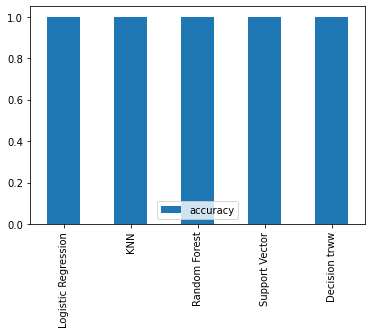

In [26]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

In [27]:
# we Will do the evaluation for SVM alone
modelx = SVC()
modelx.fit(x_train,y_train)
y_pred = modelx.predict(x_test)

y_pred

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1], dtype=int64)

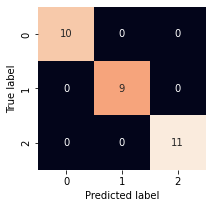

In [28]:
# Confusion matrix

def plot_conf_mat(y_test,y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot = True,
                     cbar = False)
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test,y_pred)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Conclution

in this given data set we got 100% accuracy.